# Các bước thực hiện làm sạch dữ liệu

* Loại bỏ các quan sát không mong muốn
* Sửa lỗi cấu trúc
* Quản lý các giá trị ngoại lệ không mong muốn
* Xử lý dữ liệu bị thiếu

# **`Cách thực hiện làm sạch dữ liệu`**

## Triển khai Python để dọn dẹp cơ sở dữ liệu

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Titanic dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Kiểm tra và khám phá dữ liệu**
Trước tiên, chúng ta hãy hiểu dữ liệu bằng cách kiểm tra cấu trúc của nó và xác định các giá trị bị thiếu, giá trị ngoại lệ và sự không nhất quán, sau đó kiểm tra các hàng trùng lặp bằng mã Python bên dưới:

In [ ]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


### Kiểm tra thông tin dữ liệu bằng df.info()

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*Từ thông tin dữ liệu trên, chúng ta có thể thấy rằng Age và Cabin có số lượng đếm không bằng nhau . Một số cột là loại dữ liệu và có kiểu dữ liệu là đối tượng, một số là giá trị số nguyên và số thực.*

###Kiểm tra kiểu dữ liệu các cột (số hoặc object)

In [ ]:
# Kiểm tra kiểu dliệu
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


###Kiểm tra tổng số các giá trị duy nhất trong Categorical columns

In [ ]:
# Kiểm tra tổng số Giá trị duy nhất trong các Cột danh mục
df[cat_col].nunique()


,0
Name,891
Sex,2
Ticket,681
Cabin,147
Embarked,3


# **Các bước thực hiện làm sạch dữ liệu**

**Loại bỏ tất cả các quan sát không mong muốn ở trên**


Điều này bao gồm việc xóa các **giá trị trùng lặp/dư thừa** hoặc **không liên quan** khỏi tập dữ liệu của bạn. **Các quan sát trùng lặp** thường phát sinh trong quá trình thu thập dữ liệu và **các quan sát không liên quan** là những quan sát không thực sự phù hợp với vấn đề cụ thể mà bạn đang cố gắng giải quyết.

**Các quan sát trùng lặp** làm thay đổi hiệu quả ở mức độ lớn khi dữ liệu lặp lại và có thể tăng về phía đúng hoặc về phía sai, do đó tạo ra kết quả không trung thực.
**Những quan sát không liên quan** là bất kỳ loại dữ liệu nào không có ích cho chúng ta và có thể bị xóa trực tiếp.


**Bây giờ chúng ta phải đưa ra quyết định theo chủ đề phân tích, yếu tố nào là quan trọng cho cuộc thảo luận của chúng ta.**

Như chúng ta đã biết, máy của chúng ta không hiểu dữ liệu văn bản. Vì vậy, chúng ta phải loại bỏ hoặc chuyển đổi các giá trị cột theo danh mục thành các kiểu số. Ở đây chúng ta loại bỏ các cột Tên vì Tên sẽ luôn là duy nhất và nó không ảnh hưởng nhiều đến các biến mục tiêu. Đối với vé, trước tiên hãy in 50 vé duy nhất.

In [ ]:
df['Ticket'].unique()[:50]


array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

*Từ các ticket trên, chúng ta có thể thấy rằng nó được tạo thành từ hai giá trị đầu tiên giống nhau 'A/5 21171' là giá trị kết hợp từ 'A/5' và '21171', điều này có thể ảnh hưởng đến các biến mục tiêu của chúng ta. Đây sẽ là trường hợp của Feature Engineering . trong đó chúng ta lấy các feature mới từ một cột hoặc một nhóm các cột. Trong trường hợp hiện tại, chúng ta đang loại bỏ các cột "Name" và "Ticket".*

In [ ]:
# Xóa cột Tên và Vé
df1 = df.drop(columns=['Name','Ticket'])
df1.shape


(891, 10)

# Xử lý dữ liệu bị thiếu

Thiếu dữ liệu là một vấn đề phổ biến trong các tập dữ liệu thực tế và có thể xảy ra do nhiều lý do như lỗi của con người, lỗi hệ thống hoặc vấn đề thu thập dữ liệu. Có thể sử dụng nhiều kỹ thuật khác nhau để xử lý dữ liệu bị thiếu, chẳng hạn như quy imputation, xóa hoặc thay thế.

Hãy kiểm tra % giá trị bị thiếu theo từng cột cho mỗi hàng bằng df.isnull(), hàm này kiểm tra xem các giá trị có phải là null hay không và trả về các giá trị boolean. và .sum() sẽ tính tổng số hàng có giá trị null và chúng ta chia nó cho tổng số hàng có trong tập dữ liệu, sau đó chúng ta nhân để có được các giá trị theo %, tức là trên 100 giá trị sẽ có bao nhiêu giá trị null.

In [ ]:
# phần trăm dữ liệu bị thiếu trên từng cột
round((df1.isnull().sum()/df1.shape[0])*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Fare,0.00
Cabin,77.10
Embarked,0.22


giải thích code:
* df1.isnull(): Kiểm tra mỗi giá trị trong df1 để xem nó có bị thiếu (null) hay không. Kết quả sẽ là một DataFrame mới với cùng kích thước như df1, trong đó giá trị là True nếu giá trị bị thiếu, và False nếu không.

* df1.isnull().sum(): Đếm số lượng giá trị bị thiếu (null) trong mỗi cột của df1. Kết quả sẽ là một Series, trong đó chỉ số là tên cột và giá trị là số lượng giá trị null trong cột đó.

* df1.shape[0]: Lấy số hàng của DataFrame df1.

* (df1.isnull().sum() / df1.shape[0]): Tính tỷ lệ giá trị bị thiếu trên tổng số hàng của từng cột, kết quả là một Series với mỗi giá trị là tỷ lệ phần trăm (chưa được nhân với 100).

* (df1.isnull().sum() / df1.shape[0]) * 100: Nhân tỷ lệ giá trị bị thiếu với 100 để chuyển đổi thành phần trăm.

* round(..., 2): Làm tròn kết quả đến hai chữ số thập phân.



Chúng ta không thể bỏ qua hoặc loại bỏ các quan sát bị thiếu. Chúng phải được xử lý cẩn thận vì chúng có thể là dấu hiệu của điều gì đó quan trọng.

**Hai cách phổ biến nhất để xử lý dữ liệu bị thiếu là:**
* **Loại bỏ các quan sát có giá trị bị thiếu .**

* Bản thân việc giá trị bị thiếu có thể mang tính thông tin.
* Thêm vào đó, trong thế giới thực, bạn thường cần phải đưa ra dự đoán về dữ liệu mới ngay cả khi một số tính năng bị thiếu!
* Như chúng ta có thể thấy từ kết quả trên, Cabin có 77% giá trị null, Age có 19,87% và Embarked có 0,22% giá trị null.

* Vì vậy, không nên điền 77% giá trị null. Vì vậy, chúng ta sẽ bỏ cột Cabin. Cột Embarked chỉ có 0,22% giá trị null, vì vậy, chúng ta sẽ bỏ các hàng giá trị null của cột Embarked.

In [ ]:
df2 = df1.drop(columns='Cabin')
# df2.dropna(): hàm này để xóa các gtrị bị thiếu
# (cột muốn ktra, axis=0: xóa hàng (1 xóa cột), inplace)
# Tham số inplace=True chỉ định rằng thay đổi sẽ được áp dụng trực tiếp lên DataFrame df2 mà không cần tạo ra một bản sao.
# Nếu không dùng inplace=True, bạn sẽ cần gán lại DataFrame (df2 = df2.dropna(...)).
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape


(889, 9)

**Bổ sung các giá trị còn thiếu từ những quan sát trước đó**
* Một lần nữa, “sự thiếu hụt” hầu như luôn mang tính thông tin và bạn nên cho thuật toán của mình biết nếu có giá trị nào đó bị thiếu.
* Ngay cả khi bạn xây dựng một mô hình để đưa ra các giá trị của mình, bạn cũng không thêm bất kỳ thông tin thực tế nào. Bạn chỉ củng cố các mẫu đã được cung cấp bởi các tính năng khác.

* Chúng ta có thể sử dụng phép quy ước trung bình hoặc phép quy ước trung vị cho trường hợp này.

* Ghi chú:

* Phương pháp quy ước giá trị trung bình phù hợp khi dữ liệu phân phối chuẩn và không có giá trị ngoại lệ cực đoan.
* Việc quy ước trung vị được ưu tiên khi dữ liệu chứa các giá trị ngoại lai hoặc bị lệch.



In [ ]:
# Mean imputation
# fillna(): thay thế các giá trị bị thiếu bằng giá trị tbình(mean)
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again: kiểm tra lại xem còn null k
df3.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# **Xử lý các giá trị ngoại lệ: Handling Outliers**

Giá trị ngoại lệ là các giá trị cực đoan lệch đáng kể so với phần lớn dữ liệu. Chúng có thể tác động tiêu cực đến hiệu suất phân tích và mô hình. Các kỹ thuật như phân cụm, nội suy hoặc chuyển đổi có thể được sử dụng để xử lý giá trị ngoại lệ.

Để kiểm tra các giá trị ngoại lai, chúng ta thường sử dụng biểu đồ hộp. Biểu đồ hộp, còn được gọi là biểu đồ hộp và râu, là biểu diễn đồ họa về phân phối của một tập dữ liệu. Biểu đồ này hiển thị trung vị, tứ phân vị và các giá trị ngoại lai tiềm ẩn của một biến. Đường thẳng bên trong hộp biểu thị trung vị, trong khi bản thân hộp biểu thị phạm vi liên tứ phân vị (IQR). Các râu mở rộng đến các giá trị không ngoại lai cực đoan nhất trong phạm vi 1,5 lần IQR. Các điểm riêng lẻ ngoài râu được coi là các giá trị ngoại lai tiềm ẩn. Biểu đồ hộp cung cấp tổng quan dễ hiểu về phạm vi của dữ liệu và giúp xác định các giá trị ngoại lai hoặc độ lệch trong phân phối.

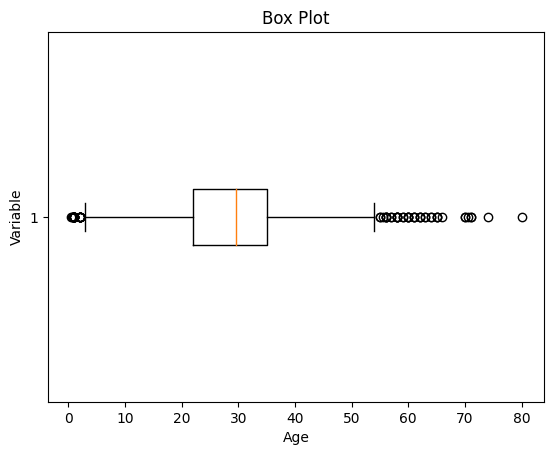

In [ ]:
# Hãy vẽ biểu đồ hộp cho dữ liệu cột Tuổi.
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()


*Như chúng ta có thể thấy từ biểu đồ Box and ria mép ở trên, tập dữ liệu tuổi của chúng ta có các giá trị ngoại lệ. Các giá trị nhỏ hơn 5 và lớn hơn 55 là ngoại lệ.*

In [ ]:
# calculate summary statistics
#Tbình
mean = df3['Age'].mean()
# độ lệch chuẩn
std  = df3['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound)
                & (df3['Age'] <= upper_bound)]


Lower Bound : 3.7054001079256587
Upper Bound : 55.57878528533277


*Tương tự như vậy, chúng ta có thể loại bỏ các giá trị ngoại lai của các cột còn lại.*

# Chuyển đổi dữ liệu  

Chuyển đổi dữ liệu bao gồm việc chuyển đổi dữ liệu từ dạng này sang dạng khác để phù hợp hơn cho việc phân tích. Các kỹ thuật như chuẩn hóa, chia tỷ lệ hoặc mã hóa có thể được sử dụng để chuyển đổi dữ liệu.

Xác thực và xác minh dữ liệu
Xác thực và kiểm chứng dữ liệu bao gồm việc đảm bảo dữ liệu chính xác và nhất quán bằng cách so sánh với các nguồn bên ngoài hoặc kiến ​​thức chuyên môn.

Đối với dự đoán học máy, Đầu tiên, chúng tôi tách các tính năng độc lập và mục tiêu. Ở đây chúng tôi sẽ chỉ xem xét 'Sex' 'Age' 'SibSp', 'Parch' 'Fare' 'Embarked' chỉ là các tính năng độc lập và Survived là các biến mục tiêu. Bởi vì PassengerId sẽ không ảnh hưởng đến tỷ lệ sống sót.

In [ ]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']


* **Định dạng dữ liệu**
* Định dạng dữ liệu bao gồm việc chuyển đổi dữ liệu thành định dạng hoặc cấu trúc chuẩn có thể dễ dàng được xử lý bằng các thuật toán hoặc mô hình được sử dụng để phân tích. Ở đây chúng ta sẽ thảo luận về các kỹ thuật định dạng dữ liệu thường được sử dụng, tức là Scaling và Normalization.

* **Tỷ lệ**

* Việc chia tỷ lệ bao gồm việc chuyển đổi các giá trị của các tính năng thành một phạm vi cụ thể. Nó duy trì hình dạng của phân phối ban đầu trong khi thay đổi tỷ lệ.
* Đặc biệt hữu ích khi các đặc điểm có nhiều tỷ lệ khác nhau và một số thuật toán nhạy cảm với độ lớn của các đặc điểm.
Các phương pháp chia tỷ lệ phổ biến bao gồm chia tỷ lệ Min-Max và Chuẩn hóa (chia tỷ lệ điểm Z).
* **Min-Max Scaling** : Min-Max Scaling sẽ chia lại các giá trị theo phạm vi chỉ định, thường là từ 0 đến 1. Nó bảo toàn phân phối ban đầu và đảm bảo rằng giá trị tối thiểu tương ứng với 0 và giá trị tối đa tương ứng với 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()


<ipython-input-16-4504e0c4e47a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


* Chuẩn hóa (thang điểm Z): Chuẩn hóa biến đổi các giá trị để có giá trị trung bình là 0 và độ lệch chuẩn là 1. Nó tập trung dữ liệu xung quanh giá trị trung bình và chia tỷ lệ dựa trên độ lệch chuẩn. Chuẩn hóa làm cho dữ liệu phù hợp hơn với các thuật toán giả định phân phối chuẩn Gauss hoặc yêu cầu các tính năng có giá trị trung bình bằng 0 và phương sai đơn vị.

`Z = (X - μ) / σ`
* Ở đâu,

* X = Dữ liệu
* μ = Giá trị trung bình của X
* σ = Độ lệch chuẩn của X